## **Importing Dependencies**

In [62]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

## **Data Collection and Analysis**

In [65]:
#Loading the Diabetes Dataset to pandas Dataframe
df = pd.read_csv('diabetes.csv')

In [67]:
#Printing first 5 dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [68]:
#Printing Number of rows and columns
df.shape

(768, 9)

In [71]:
#Getting statistical measures of data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [73]:
#Check for Missing Values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [75]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

## **0 --> Non Diabetic**
## **1 --> Diabetic**

In [78]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [80]:
#Seprating Data and Labels
X = df.drop(columns = 'Outcome', axis = 1)
Y = df['Outcome']

In [82]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [84]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## **Splitting Data First**

In [87]:
# Split the dataset into training and testing sets with 80% train and 20% test.
# 'stratify=Y' ensures the class distribution in Y is preserved in both sets,
# which is important for handling imbalanced classification problems.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify =Y , random_state = 42)

## **Data Standarization**

In [90]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [92]:
print(X.shape, X_train_norm.shape, X_test_norm.shape)

(768, 8) (614, 8) (154, 8)


## **Training the Model**

In [95]:
classifier = svm.SVC(kernel = 'linear')

In [97]:
classifier.fit(X_train_norm, Y_train)

SVC(kernel='linear')

## **Model Evaluation**

**Accuracy Score**

In [101]:
#Accuracy score on training data 
X_train_prediction = classifier.predict(X_train_norm)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [103]:
print(f"The accuracy score on train data is : {training_data_accuracy}")

The accuracy score on train data is : 0.7915309446254072


In [105]:
#Accuracy score in training data
X_test_prediction = classifier.predict(X_test_norm)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [107]:
print(f"The accuracy score on test data is : {test_data_accuracy}")

The accuracy score on test data is : 0.7207792207792207


## **Making a Predictive System**

In [129]:
input_data = (10,122,78,31,0,27.6,0.512,45)

#Convert to numpy array
input_data_nparray = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_nparray.reshape(1, -1)

#Normalize the data 
std_input_data_np = scaler.transform(input_data_reshaped)
print(std_input_data_np)

prediction = classifier.predict(std_input_data_np)

[[ 1.86648903  0.03460257  0.46536842  0.64525622 -0.73076636 -0.55675522
   0.10475271  0.98390979]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [131]:
if prediction == 0:
    print("The person doesnot have diabetes")
else:
    print("The person has diabetes")

The person doesnot have diabetes


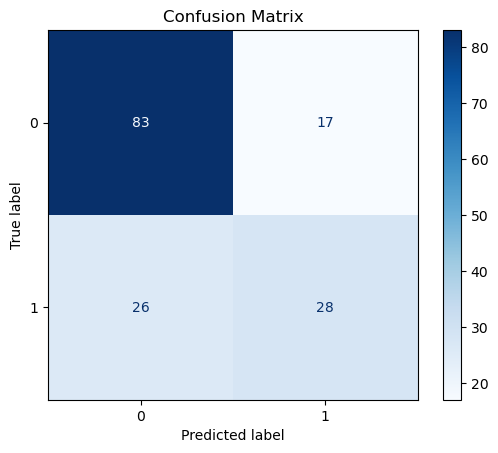

In [135]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#generate confusion matrix
cm = confusion_matrix(Y_test, X_test_prediction)

disp = ConfusionMatrixDisplay(confusion_matrix = cm)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()